***Project Owner : Sujay Torvi , Email me at sujay.torvi@gmail.com
Copyright © 2019***

# AI Capstone Project
## Domain: Retail
## Problem Statement

***Demand Forecast is one of the key tasks in Supply Chain and Retail Domain in general. It is key in effective operation and optimization of retail supply chain. Effectively solving this problem requires knowledge about a wide range of tricks in Data Sciences and good understanding of ensemble techniques.***
***You are required to predict sales for each Store-Day level for one month. All the features will be provided and actual sales that happened during that month will also be provided for model evaluation.***

## Agenda for Week 2
### Other Regression Techniques
### 1. When store is closed, sales = 0. Can this insight be used for Data Cleaning? Perform this and retrain the model. Any benefits of this step?
### 2. Use Non-Linear Regressors like Random Forest or other Tree-based Regressors.
#### a) Train a single model for all stores, where storeId can be a feature.
#### b) Train separate models for each store.
#### Note: Dimensional Reduction techniques like, PCA and Tree’s Hyperparameter Tuning will be required. Cross-validate to find the best parameters. Infer the performance of both the models. 
### 3 Compare the performance of Linear Model and Non-Linear Model from the previous observations. Which performs better and why?
### 4. Train a Time-series model on the data taking time as the only feature. This will be a store-level training.
#### a)    Identify yearly trends and seasonal months

In [0]:
#Import libraries

In [94]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_csv('train_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#loading data
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


### 1. When store is closed, sales = 0. Can this insight be used for Data Cleaning? Perform this and retrain the model. Any benefits of this step?

In [0]:
junkdata = data[data.Open == 0]

In [0]:
junkdata.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
2230,1,7,2015-06-28,0,0,0,0,0,0
2231,2,7,2015-06-28,0,0,0,0,0,0
2232,3,7,2015-06-28,0,0,0,0,0,0
2233,4,7,2015-06-28,0,0,0,0,0,0
2234,5,7,2015-06-28,0,0,0,0,0,0
2235,6,7,2015-06-28,0,0,0,0,0,0
2236,7,7,2015-06-28,0,0,0,0,0,0
2237,8,7,2015-06-28,0,0,0,0,0,0
2238,9,7,2015-06-28,0,0,0,0,0,0
2239,10,7,2015-06-28,0,0,0,0,0,0


### Upon further examininng the dataset we find that the Sales are zero whenever the store is closed. This data is really of no use to the model and such rows of data need to be eliminated from our data.

In [0]:
train = data[data.Open == 1]

In [0]:
print('{} records have been eliminated'.format(len(data)-len(train)))

168440 records have been eliminated


In [0]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [0]:
test = pd.read_csv('test_data_hidden.csv')
test = test[test.Open == 1]

In [0]:
#map a - 1, b- 2 & c - 3 in the state holiday
def cleanHoliday(x):
  if(x == 0):
    x = '0'
  elif(x == 'a'):
    x = 1
  elif(x == 'b'):
    x = 2
  elif(x == 'c'):
    x = 3
  return x
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data_hidden.csv')
train.StateHoliday = train.StateHoliday.map(cleanHoliday)
test.StateHoliday = test.StateHoliday.map(cleanHoliday)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
X_train = np.asarray(train[['Customers','Promo','StateHoliday','Open','DayOfWeek']])
X_test = np.asarray(test[['Customers','Promo','StateHoliday','Open','DayOfWeek']])
y_train = np.asarray(train['Sales'])
y_test = np.asarray(test['Sales'])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rfg = RandomForestRegressor(n_estimators = 24)

In [0]:
rfg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=24,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_pred_1 = rfg.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [0]:
rms = sqrt(mean_squared_error(y_test, y_pred_1))
mae = mean_absolute_error(y_test,y_pred_1)

In [0]:
print('Random Forest\nRMSE is {} and MAE is {}'.format(rms,mae))

Random Forest
RMSE is 1465.6706930311402 and MAE is 976.4109331734109


In [0]:
#onehot encode for DayOfWeek Attribute
dummy_1 = pd.get_dummies(train.DayOfWeek)
dummy_1.head()
#onehot encoded matrix

,1,2,3,4,5,6,7
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [0]:
train = train.join(dummy_1)

In [0]:
#onehot encode for DayOfWeek Attribute
dummy_2 = pd.get_dummies(test.DayOfWeek)
dummy_2.head()
#onehot encoded matrix

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [0]:
test = test.join(dummy_2)

In [0]:
train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,1,2,3,4,5,6,7
0,1,2,2015-06-30,5735,568,1,1,0,0,0,1,0,0,0,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0,0,1,0,0,0,0,0


In [0]:
test.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,1,2,3,4,5,6,7
0,1,5,2015-07-31,5263,555,1,1,0,1,0,0,0,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,0,0,1,0,0


In [0]:
train.columns = ['Store','DayOfWeek','Date','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday','1','2','3','4','5','6','7']
test.columns = ['Store','DayOfWeek','Date','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday','1','2','3','4','5','6','7']

In [0]:
X_train = np.asarray(train[['Customers','Promo','Open','1','2','3','4','5','6','7']])
X_test = np.asarray(test[['Customers','Promo','Open','1','2','3','4','5','6','7']])
y_train = np.asarray(train['Sales'])
y_test = np.asarray(test['Sales'])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
linereg1 = LinearRegression()
linereg1.fit(X_train,y_train)
y_pred_2 = linereg1.predict(X_test)
rms = sqrt(mean_squared_error(y_test, y_pred_2))
mae = mean_absolute_error(y_test,y_pred_2)
print('Linear Regression Model 1\nRMSE is {} and MAE is {}'.format(rms,mae))

Linear Regression Model 1
RMSE is 1522.5963291146713 and MAE is 1015.2718965521611


**Lets Draw A Comparision**

***Week 1 Results:***

| Model | RMSE| MAE|
| --- | --- | --- |
| Linear Regression(OneHot Encoding)| 1522.596 | 1015.27 |
| Random Forest Regression | 1471.019 | 978.179 |

***Week 2 Results(After eliminating useless records):***

| Model | RMSE| MAE|
| --- | --- | --- |
| Linear Regression(OneHot Encoding)| 1522.596 | 1015.27 |
| Random Forest Regression | 1467.35 | 977.14|

### The results remain almost the same , random forest is slightly better than week 1. The change is not noticeable. 

|      |   Store |   DayOfWeek | Date       |   Sales |   Customers |   Open |   Promo |   StateHoliday |   SchoolHoliday |
|-----:|--------:|------------:|:-----------|--------:|------------:|-------:|--------:|---------------:|----------------:|
| 2230 |       1 |           7 | 2015-06-28 |       0 |           0 |      0 |       0 |              0 |               0 |
| 2231 |       2 |           7 | 2015-06-28 |       0 |           0 |      0 |       0 |              0 |               0 |
| 2232 |       3 |           7 | 2015-06-28 |       0 |           0 |      0 |       0 |              0 |               0 |
| 2233 |       4 |           7 | 2015-06-28 |       0 |           0 |      0 |       0 |              0 |               0 |
| 2234 |       5 |           7 | 2015-06-28 |       0 |           0 |      0 |       0 |              0 |               0 |

### As we can see almost every feature(except DayOfWeek, not considering storeid and date) is 0 in this case when the store is closed. This may explain the reason as to why the models did not improve much. Since the data is 0 in most of the features they did not affect the model very much and in the case of linear regression the equation did not change. 

### From a data analysis perspective this data is bad as it does not provide any significant information and consumes lot of memory.

### 2. Use Non-Linear Regressors like Random Forest or other Tree-based Regressors.
#### a) Train a single model for all stores, where storeId can be a feature.
#### b) Train separate models for each store.

In [0]:
from sklearn.model_selection import KFold

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [0]:
# a. using storeid feature
X_train = np.asarray(train['Store'])
X_test = np.asarray(test['Store'])
y_train = np.asarray(train['Sales'])
y_test = np.asarray(test['Sales'])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [0]:
rf_reg = RandomForestRegressor(n_estimators = 12)
rf_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=12,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
X_test = X_test.reshape(-1,1)
y_pred_3 = rf_reg.predict(X_test)

In [0]:
rms = sqrt(mean_squared_error(y_test, y_pred_3))
mae = mean_absolute_error(y_test,y_pred_3)
print('Random Forest\nRMSE is {} and MAE is {}'.format(rms,mae))

Random Forest
RMSE is 2949.0821040478477 and MAE is 2153.9816481381094


In [0]:
print('Train Score {} \nTest Score {}'.format(rf_reg.score(X_train,y_train),rf_reg.score(X_test,y_test)))

Train Score 0.2832815305692066 
Test Score 0.3311596288789245


#### Random Forest rarely underfits, here it is underfitting , why? it got only one feature to train with, which is not suitable for an algorithm which takes multiple features and builds a tree to predict the label.

### Perform Training using KFold Cross Validation

In [0]:
kf = KFold(n_splits = 10, shuffle = True)
rf_reg = RandomForestRegressor(n_estimators = 12)

In [0]:
scores = []
rmse = []
mae = []
for i in range(10):
    result = next(kf.split(train), None)
    X_train = np.asarray(train['Store'])
    X_test = np.asarray(train['Store'])
    y_train = np.asarray(train['Sales'])
    y_test = np.asarray(train['Sales'])
    X_train = X_train.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    rf_reg.fit(X_train,y_train)
    predictions = rf_reg.predict(X_test)
    scores.append(rf_reg.score(X_test,y_test))
    rmse.append(sqrt(mean_squared_error(y_test, predictions)))
    mae.append(mean_absolute_error(y_test,predictions))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))
print('RMSE of each iteration:', rmse)
print('MAE of each iteration:', mae)
print('Average RMSE = {} , MAE = {}'.format(np.mean(rmse),np.mean(mae)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y wa

Scores from each Iteration:  [0.2832857639917613, 0.2832824646120792, 0.28328582476571396, 0.2832822126271638, 0.2832801416546791, 0.2832897967502963, 0.2832854626035264, 0.2832801028933464, 0.2832866873536366, 0.2832785038496629]
Average K-Fold Score : 0.2832836961101866
RMSE of each iteration: [3265.7805461580565, 3265.78806312719, 3265.7804076967377, 3265.7886372231314, 3265.7933555053078, 3265.771358310072, 3265.781232810896, 3265.793443814917, 3265.778442461723, 3265.797086900232]
MAE of each iteration: [2345.723299950071, 2345.399643860158, 2345.2834210526166, 2345.4031732558847, 2345.179311966303, 2345.352588878939, 2345.343960353011, 2345.58440927593, 2345.3571043022594, 2345.402211265151]
Average RMSE = 3265.785257400826 , MAE = 2345.4029124160324


### b. Seperate Models for each store

In [0]:
X_train = np.asarray(train[['Customers','Promo','StateHoliday','Open','DayOfWeek']])
X_test = np.asarray(test[['Customers','Promo','StateHoliday','Open','DayOfWeek']])
y_train = np.asarray(train['Sales'])
y_test = np.asarray(test['Sales'])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

#### Perhaps RandomForest does not need any OneHot Encoding, from week 1 experience RandomForest without any OneHot encoding was performing better than the linear regression with OneHot encoding

In [0]:
rf_reg = RandomForestRegressor(n_estimators = 12)
rf_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=12,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_pred_4 = rf_reg.predict(X_test)

In [0]:
rms = sqrt(mean_squared_error(y_test, y_pred_4))
mae = mean_absolute_error(y_test,y_pred_4)
print('Random Forest\nRMSE is {} and MAE is {}'.format(rms,mae))
print('Train Score {} \nTest Score {}'.format(rf_reg.score(X_train,y_train),rf_reg.score(X_test,y_test)))

Random Forest
RMSE is 1471.8673412111204 and MAE is 978.9612183221069
Train Score 0.8894732173417762 
Test Score 0.8334239804523793


In [0]:
X_train = np.asarray(train[['Customers','Promo','Open']])
X_test = np.asarray(test[['Customers','Promo','Open']])
y_train = np.asarray(train['Sales'])
y_test = np.asarray(test['Sales'])
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
rf_reg = RandomForestRegressor(n_estimators = 10)
rf_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
y_pred_5 = rf_reg.predict(X_test)

In [0]:
rms = sqrt(mean_squared_error(y_test, y_pred_5))
mae = mean_absolute_error(y_test,y_pred_5)
print('Random Forest\nRMSE is {} and MAE is {}'.format(rms,mae))
print('Train Score {} \nTest Score {}'.format(rf_reg.score(X_train,y_train),rf_reg.score(X_test,y_test)))

Random Forest
RMSE is 1477.63684189601 and MAE is 981.2472084448127
Train Score 0.8724957002867018 
Test Score 0.8321155146160776


### Here As we can see the model is slightly overfitting. As usual with Decision Trees and Random Forests. Tree Based Models likely overfit in this case. To control overfitting lets try using KFold Cross Validation

### Perform Training using KFold Cross Validation

In [0]:
kf = KFold(n_splits = 8, shuffle = True)
rf_reg = RandomForestRegressor(n_estimators = 6)

In [0]:
scores = []
train_scores = []
rmse = []
mae = []
for i in range(10):
    result = next(kf.split(train), None)
    X_train = np.asarray(train[['Customers','Promo','StateHoliday','Open','DayOfWeek']])
    X_test = np.asarray(test[['Customers','Promo','StateHoliday','Open','DayOfWeek']])
    y_train = np.asarray(train['Sales'])
    y_test = np.asarray(test['Sales'])
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    rf_reg.fit(X_train,y_train)
    predictions = rf_reg.predict(X_test)
    scores.append(rf_reg.score(X_test,y_test))
    train_scores.append(rf_reg.score(X_train,y_train))
    rmse.append(sqrt(mean_squared_error(y_test, predictions)))
    mae.append(mean_absolute_error(y_test,predictions))
print('Train Scores from each Iteration: ', train_scores)
print('Average K-Fold Train Score :' , np.mean(train_scores))
print('Test Scores from each Iteration: ', scores)
print('Average K-Fold Test Score :' , np.mean(scores))
print('RMSE of each iteration:', rmse)
print('MAE of each iteration:', mae)
print('Average RMSE = {} , MAE = {}'.format(np.mean(rmse),np.mean(mae)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel

Train Scores from each Iteration:  [0.8885256316089191, 0.8885793611074543, 0.8885754860040433, 0.8885456326931861, 0.8885239910662773, 0.8884886071646035, 0.888546671612561, 0.8884461564138655, 0.8885338443575735, 0.888564780067724]
Average K-Fold Train Score : 0.8885330162096208
Test Scores from each Iteration:  [0.8885256316089191, 0.8885793611074543, 0.8885754860040433, 0.8885456326931861, 0.8885239910662773, 0.8884886071646035, 0.888546671612561, 0.8884461564138655, 0.8885338443575735, 0.888564780067724]
Average K-Fold Test Score : 0.8885330162096208
RMSE of each iteration: [1287.957381295775, 1287.6469527828358, 1287.6693441537886, 1287.8418314160099, 1287.9668585471884, 1288.1712508523406, 1287.8358291077075, 1288.4164214665016, 1287.909936016494, 1287.7312038576345]
MAE of each iteration: [863.0129110838036, 862.5452656367172, 862.6561148307628, 862.5967063758713, 862.7335801434047, 862.9291475187915, 862.8683251149604, 862.8505324901882, 862.7632224967923, 862.7732418076973]
A

In [0]:
print(rf_reg.score(X_train,y_train))
print(rf_reg.score(X_test,y_test))

0.888564780067724
0.888564780067724


### Hence using KFold the Overfitting of Random Forest Model has been Controlled

In [0]:
### After this point we will use cross validation to Train all the model

### Perform Standardization of data using Standard Scaler

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
train = train[['DayOfWeek','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday']]
test = test[['DayOfWeek','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday']]

In [0]:
X_train = np.asarray(train[['DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday']])
X_test = np.asarray(test[['DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday']])
y_train = np.asarray(train.Sales)
y_test = np.asarray(test.Sales)

In [0]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = StandardScaler().fit_transform(y_train)
y_test = StandardScaler().fit_transform(y_test)

### Using Principal Component Analysis 

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(.95) #will retain 95% variance in the data

In [0]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.n_components_ #shows how many features pca chose

5

In [0]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### Linear Regression Model

In [0]:
linereg = LinearRegression()

In [0]:
kf = KFold(n_splits = 8, shuffle = True)

In [0]:
scores = []
train_scores = []
rmse = []
mae = []
for i in range(8):
    result = next(kf.split(X_train), None)
    linereg.fit(X_train,y_train)
    predictions = linereg.predict(X_test)
    scores.append(linereg.score(X_test,y_test))
    train_scores.append(linereg.score(X_train,y_train))
    rmse.append(sqrt(mean_squared_error(y_test, predictions)))
    mae.append(mean_absolute_error(y_test,predictions))
print('Train Scores from each Iteration: ', train_scores)
print('Average K-Fold Train Score :' , np.mean(train_scores))
print('Test Scores from each Iteration: ', scores)
print('Average K-Fold Test Score :' , np.mean(scores))
print('RMSE of each iteration:', rmse)
print('MAE of each iteration:', mae)
print('Average RMSE = {} , MAE = {}'.format(np.mean(rmse),np.mean(mae)))

Train Scores from each Iteration:  [0.8443247213348174, 0.8443247213348174, 0.8443247213348174, 0.8443247213348174, 0.8443247213348174, 0.8443247213348174, 0.8443247213348174, 0.8443247213348174]
Average K-Fold Train Score : 0.8443247213348174
Test Scores from each Iteration:  [0.8142457264062288, 0.8142457264062288, 0.8142457264062288, 0.8142457264062288, 0.8142457264062288, 0.8142457264062288, 0.8142457264062288, 0.8142457264062288]
Average K-Fold Test Score : 0.8142457264062288
RMSE of each iteration: [0.4309921966738738, 0.4309921966738738, 0.4309921966738738, 0.4309921966738738, 0.4309921966738738, 0.4309921966738738, 0.4309921966738738, 0.4309921966738738]
MAE of each iteration: [0.30791260767866935, 0.30791260767866935, 0.30791260767866935, 0.30791260767866935, 0.30791260767866935, 0.30791260767866935, 0.30791260767866935, 0.30791260767866935]
Average RMSE = 0.4309921966738738 , MAE = 0.30791260767866935


### Random Forest Model

In [0]:
kf = KFold(n_splits = 3, shuffle = True)
rf_reg = RandomForestRegressor(n_estimators = 6)

In [0]:
scores = []
train_scores = []
rmse = []
mae = []
for i in range(3):
    result = next(kf.split(X_train), None)
    rf_reg.fit(X_train,y_train)
    predictions = rf_reg.predict(X_test)
    scores.append(rf_reg.score(X_test,y_test))
    train_scores.append(rf_reg.score(X_train,y_train))
    rmse.append(sqrt(mean_squared_error(y_test, predictions)))
    mae.append(mean_absolute_error(y_test,predictions))
print('Train Scores from each Iteration: ', train_scores)
print('Average K-Fold Train Score :' , np.mean(train_scores))
print('Test Scores from each Iteration: ', scores)
print('Average K-Fold Test Score :' , np.mean(scores))
print('RMSE of each iteration:', rmse)
print('MAE of each iteration:', mae)
print('Average RMSE = {} , MAE = {}'.format(np.mean(rmse),np.mean(mae)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Train Scores from each Iteration:  [0.892744688989555, 0.892790666743154, 0.892806870826633]
Average K-Fold Train Score : 0.8927807421864472
Test Scores from each Iteration:  [0.7976625182771724, 0.8005515628209294, 0.7995867729234378]
Average K-Fold Test Score : 0.7992669513405133
RMSE of each iteration: [0.4498193878912154, 0.44659650376942117, 0.4476753590232124]
MAE of each iteration: [0.332441676525114, 0.32853717159998674, 0.3304057910646052]
Average RMSE = 0.4480304168946163 , MAE = 0.33046154639656866


### Tree Hyperparameter Tuning

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
rf = RandomForestRegressor()

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [0]:
param_grid = { 
    'n_estimators': [5,6,7,8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6]
}

In [0]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 36, cv = 3, verbose=2, random_state=42, n_jobs = 36)

In [0]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=36)]: Done  92 out of 108 | elapsed:  5.4min remaining:   56.1s
[Parallel(n_jobs=36)]: Done 108 out of 108 | elapsed:  5.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [0]:
rf_random.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 6}

In [0]:
print('Train Score = {} , Test Score = {}'.format(rf_random.score(X_train,y_train),rf_random.score(X_test,y_test)))

Train Score = 0.8446892529987605 , Test Score = 0.703715744211332


In [0]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 5, verbose=2, random_state=42, n_jobs = 15)

In [0]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 out of  15 | elapsed:  1.4min remaining:  8.8min
[Parallel(n_jobs=15)]: Done  10 out of  15 | elapsed:  6.4min remaining:  3.2min
[Parallel(n_jobs=15)]: Done  15 out of  15 | elapsed:  8.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [0]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 20}

In [0]:
print('Train Score = {} , Test Score = {}'.format(rf_random.score(X_train,y_train),rf_random.score(X_test,y_test)))

Train Score = 0.889471990631522 , Test Score = 0.8099745132107965


### Hyperparameter Tuning is exhaustive and takes a lot of time and computations. Hence there is a need to restrict choices when it comes to parameters. Here 2 grids have been used, param_grid which has less number of parameters to tune from and a random_grid which has more parameters to choose from. If we make the calculation then for random_grid total 792 possible combination to search from. Given the size of train data and since sklearn does not have GPU support , it will take about almost one day to choose best hyperparameters and train the RandomForest Model. Hence n_iterations has been restricted to 3 to randomly select any 3 parameter combination and rather select 5 folds for cross validation to control overfitting.

### Observations

**Lets Draw A Comparision**

**Pincipal Component Analysis**

| Model | Training Score | Testing Score |
| --- | --- | --- |
| Linear Regression| 0.844 | 0.814 |
| Random Forest Regression | 0.892 | 0.799 |

***Hyperparameter Tuning of Random Forest Model(using PCA Selected Features):***

***Model 1 : 36 different hyperparameters with 3 fold cross validation***

***Model 2 : 3 different hyperparameters with 5 fold cross validation***

| Model | Training Score| Testing Score|
| --- | --- | --- |
| Model 1| 0.844 | 0.703|
| Model 2| 0.889 | 0.809|

### Which Model performed best and why

### Linear Regression Model has the best testing score of all the model. After the scaling of data, the orders of magnitude are roughly the same across all the features. Hence the model was able to cover maximum amount of points(although it overfits, it is the best model that was achieved).

### Random Forest with 5 fold cross validation was close to the Linear Regression Model. From above observation the no. of cross folds has contributed more to the accuracy score than the selection of best hyperparameter. When trained with less combination of hyperparameters and more cross folds it performs better than the one having tested more hyperparameter combinations but less cross folds.


### 4. Train a Time-series model on the data taking time as the only feature. 
#### a)Identify yearly trends and seasonal months

### One way to approach this problem is to first take average of sales for all stores for each day(s), and then take the sum of all sales and group them monthly. Then convert the timeseries into a stationary model(if it isnt) and then use AR , MA models and integrate them to get the ARIMA model.

### We can then use the test data to judge the ARIMA model. However we will take the RMSE for the whole data (TRAIN + TEST).

In [95]:
train = pd.read_csv('train_data.csv')

In [96]:
test = pd.read_csv('test_data_hidden.csv')

In [97]:
train = train[train.Open == 1]
test = test[test.Open == 1]

In [98]:
#train = train[train.Store == 1]
#test = test[test.Store == 1]

In [99]:
train = train[['Date','Sales']]
test = test[['Date','Sales']]

In [100]:
train = train.groupby('Date').mean().reset_index()
test = test.groupby('Date').mean().reset_index()

In [101]:
train = train.set_index('Date')
test = test.set_index('Date')

In [102]:
import matplotlib.pyplot as plt

In [103]:
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

In [104]:
train = train['Sales'].resample('MS').sum()
test = test['Sales'].resample('MS').sum()

In [105]:
train.head()

Date
2013-01-01    198562.603856
2013-02-01    189830.319099
2013-03-01    231466.767924
2013-04-01    197156.315282
2013-05-01    223986.238683
Freq: MS, Name: Sales, dtype: float64

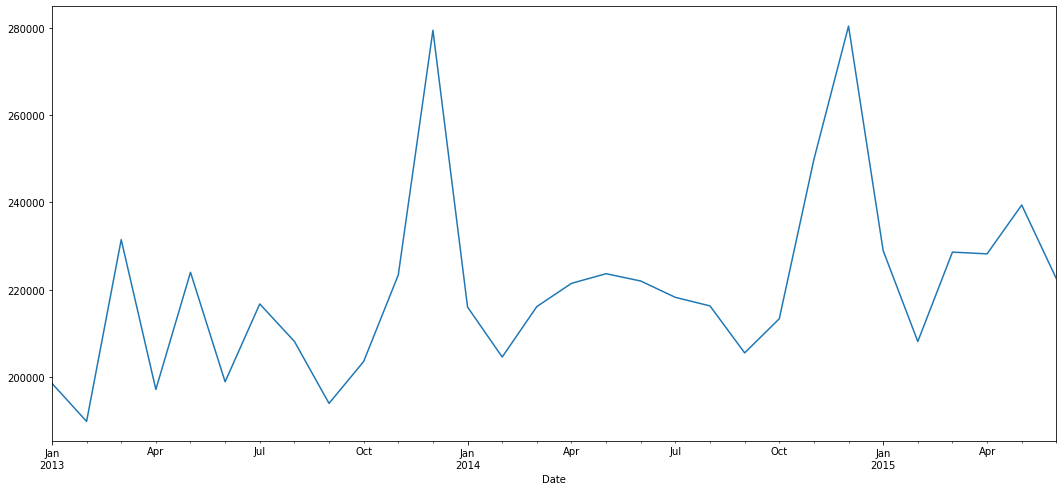

In [106]:
train.plot()

### Seasonality Pattern: Sales Generally start rising during october peak at November and fall at January

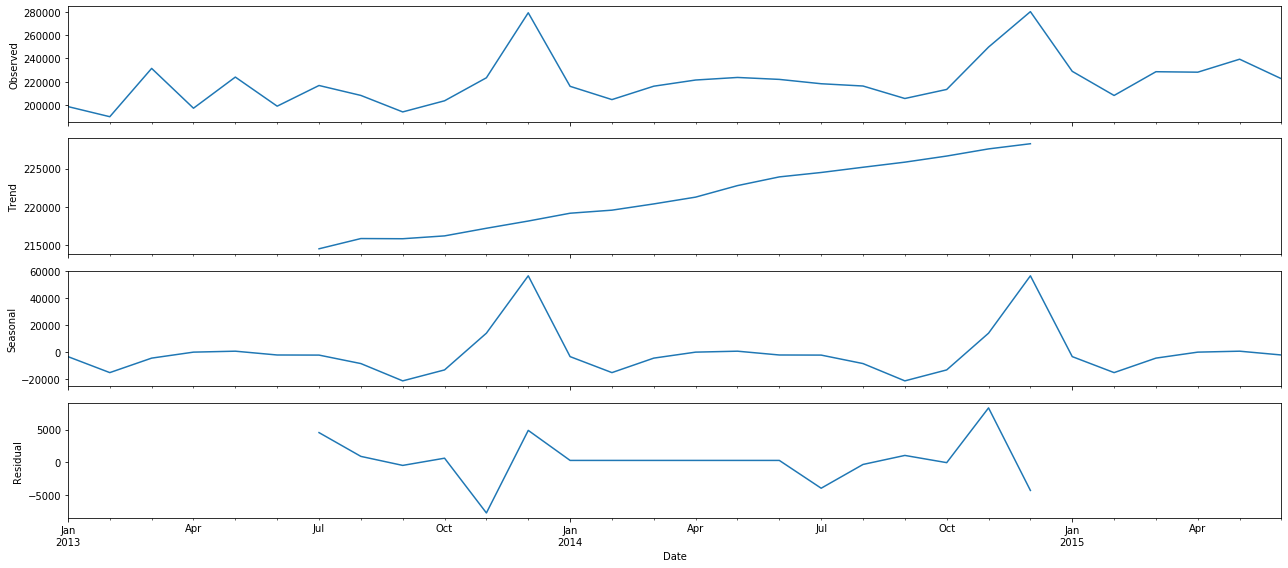

In [107]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train, model='additive')
fig = decomposition.plot()
plt.show()

### Above shows the seasonality and the trend pattern

## **Time series forecasting**

### We need to check if time series is stationary or not
**Use a Dickey-Fuller Test**

In [108]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

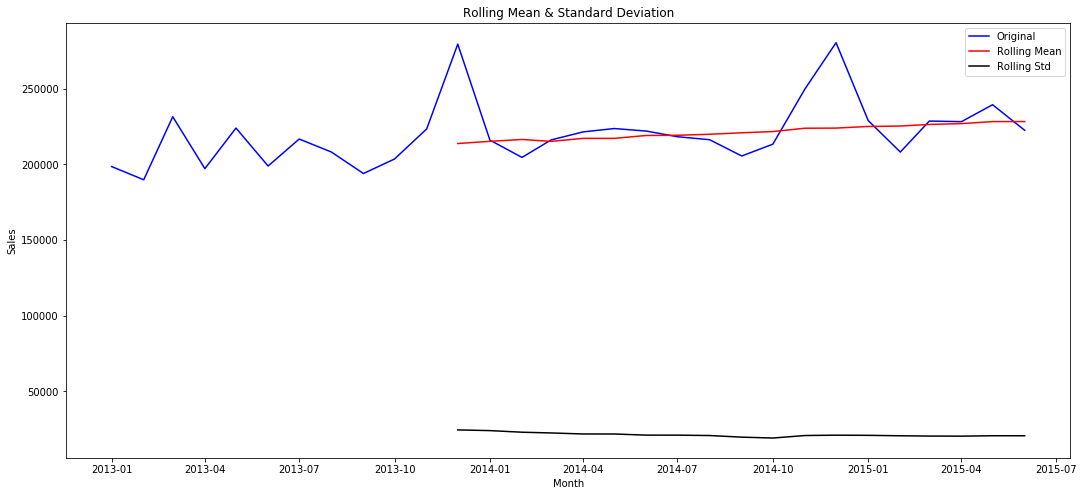

Results of Dickey-Fuller Test:
Test Statistic                 -4.054360
p-value                         0.001151
#Lags Used                      1.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [109]:
test_stationarity(train)

### For a Time Series to be stationary following should NOT be present:
#### ***1. Trend.***
#### ***2. Seasonality.***

### It can be concluded that the timeseries data is not stationary since:
#### ***1. Mean is constant and not increasing as shown in the plot(i.e No trend).***
#### ***2. There is a constant seasonality pattern.(i.e present seasonality).***

### Although trend is absent, seasonality is there hence we need to make the time series stationary.

In [110]:
train_log = np.log(train)

### Perform Differencing to eliminate any remaining trend

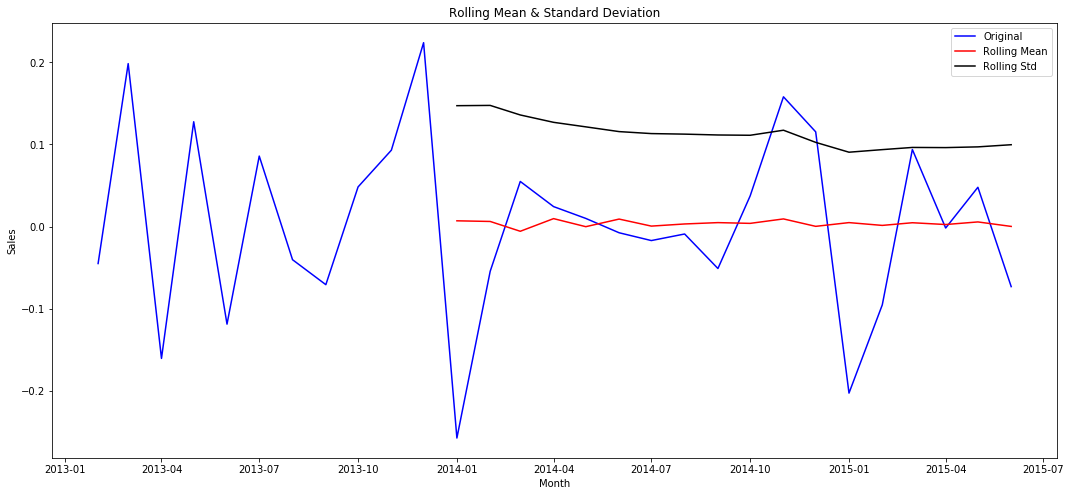

Results of Dickey-Fuller Test:
Test Statistic                 -2.244370
p-value                         0.190537
#Lags Used                      9.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


In [111]:
train_log_diff = train_log - train_log.shift()
train_log_diff.dropna(inplace=True)
test_stationarity(train_log_diff)

### Perform Decomposition to remove seasonality

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

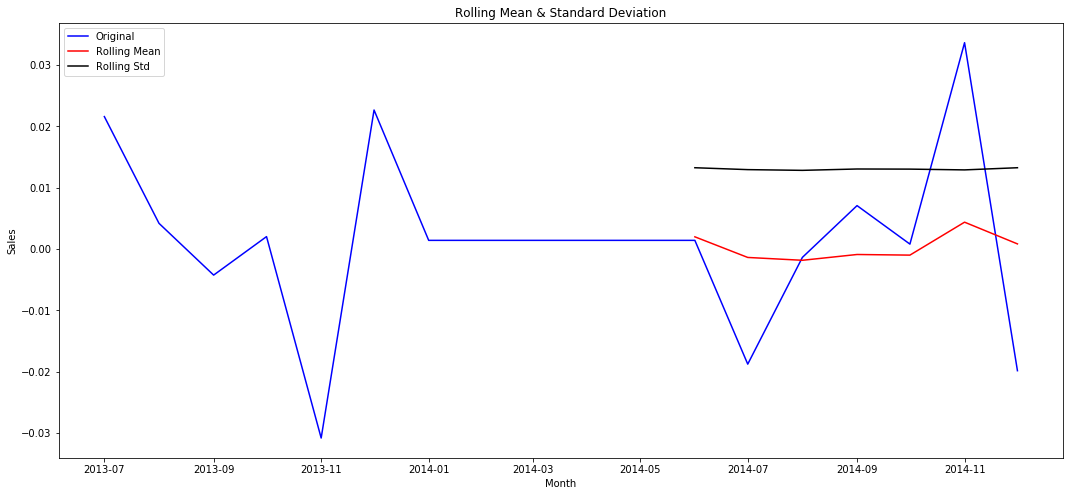

Results of Dickey-Fuller Test:
Test Statistic                 -2.662559
p-value                         0.080744
#Lags Used                      7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [113]:
train_log_decompose = residual
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose)

### TAKE DIFFERENCE OF DECOMPOSITION ALSO[OTHERWISE YOU WILL NOT GET A STATIONARY MODEL]

### This is because we need to Decompose to remove seasonality and take the difference to remove trend. Even a slightest amount of trend will create errors while running the ARIMA model.

In [114]:
train_log_decompose_diff = train_log_decompose - train_log_decompose.shift()
train_log.dropna(inplace=True)

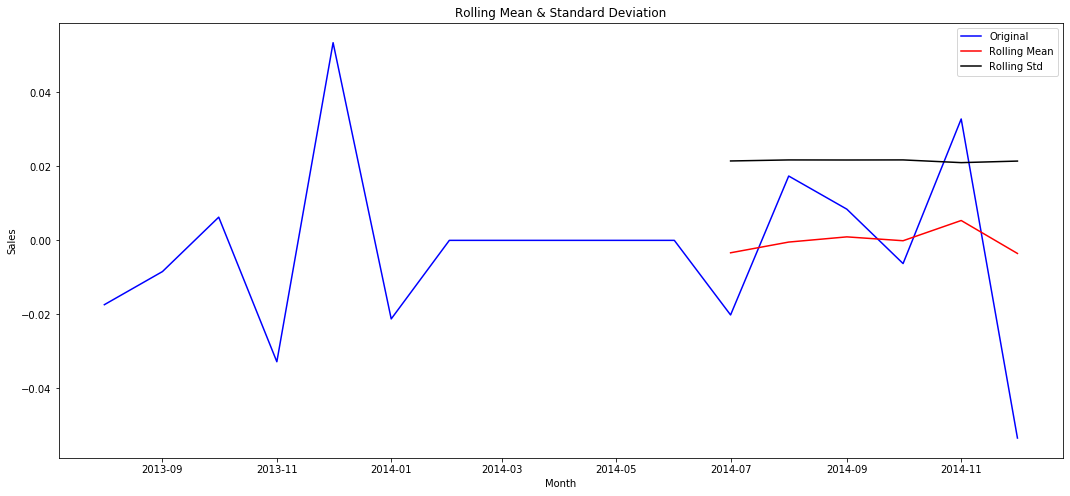

Results of Dickey-Fuller Test:
Test Statistic                -7.565892e+00
p-value                        2.926556e-11
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+01
Critical Value (1%)           -3.924019e+00
Critical Value (5%)           -3.068498e+00
Critical Value (10%)          -2.673893e+00
dtype: float64


In [115]:
train_log_decompose_diff.dropna(inplace = True)
test_stationarity(train_log_decompose_diff)

In [116]:
# Compute Models
from statsmodels.tsa.arima_model import ARIMA

### AR Model

Text(0.5, 1.0, 'AR Model')

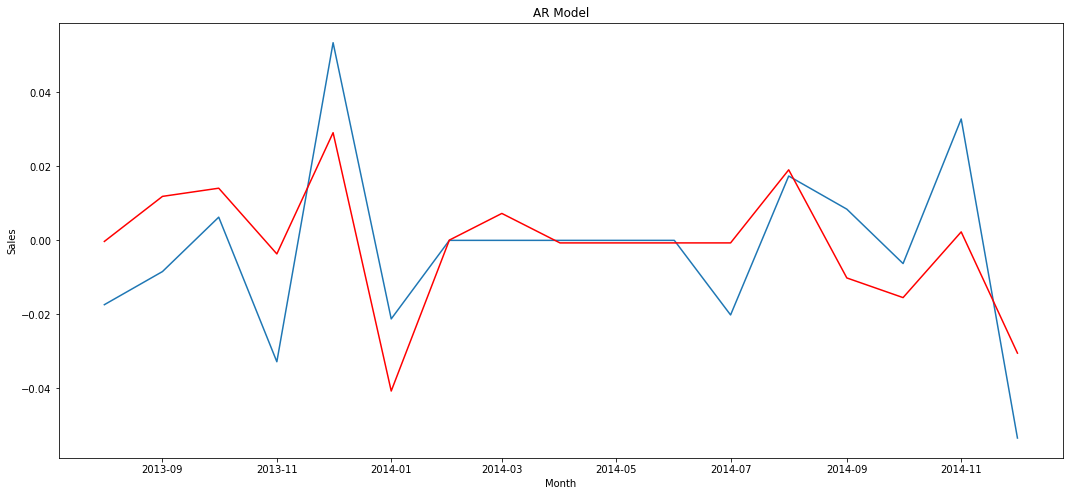

In [117]:
model = ARIMA(train_log_decompose, order=(2, 1, 0)) #Order for AR Model 
results_AR = model.fit(disp=-1) # fit the AR Model 
plt.plot(train_log_decompose_diff)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR Model')

### MA Model

Text(0.5, 1.0, 'MA Model')

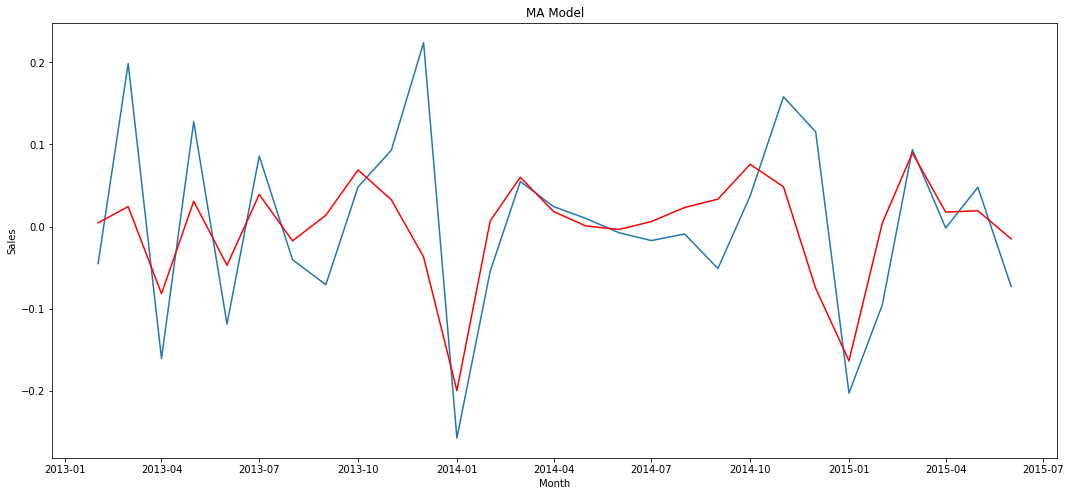

In [118]:
model = ARIMA(train_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model')

### ARIMA Model

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'ARIMA MODEL')

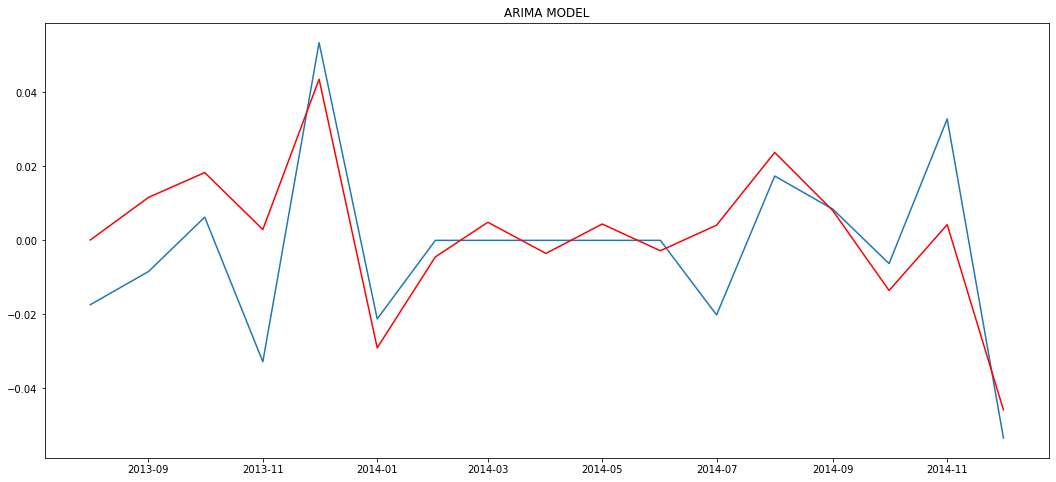

In [0]:
model = ARIMA(train_log_decompose, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_decompose_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA MODEL')

### Rescaling & Forecasting

In [0]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2013-08-01    0.000111
2013-09-01    0.011613
2013-10-01    0.018336
2013-11-01    0.002928
2013-12-01    0.043572
Freq: MS, dtype: float64


In [0]:
# Perform Cumulative summation
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2013-08-01    0.000111
2013-09-01    0.011724
2013-10-01    0.030059
2013-11-01    0.032988
2013-12-01    0.076560
Freq: MS, dtype: float64


In [0]:
predictions_ARIMA_log = pd.Series(train_log.ix[0], index=train_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-01-01    12.19886
2013-02-01    12.19886
2013-03-01    12.19886
2013-04-01    12.19886
2013-05-01    12.19886
Freq: MS, dtype: float64

Text(0.5, 1.0, 'RMSE: 25811.3098')

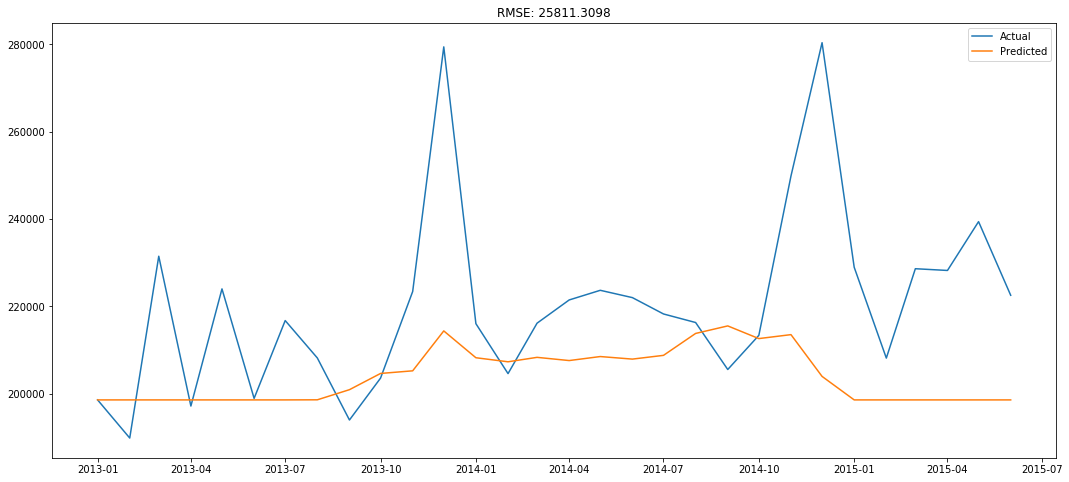

In [0]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(train,label='Actual')
plt.plot(predictions_ARIMA,label='Predicted')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-train)**2)/len(train)))

### Testing our model on test data

In [0]:
forecast = results_ARIMA.forecast()[0]

In [0]:
predict = results_ARIMA.predict(start = 1,end = 24)

In [0]:
test

Date
2015-07-01    224777.868109
Freq: MS, Name: Sales, dtype: float64

In [0]:
test_log = np.log(test)

In [0]:
# Perform Cumulative summation
predictions_ARIMA_diff_cumsum_ = predict.cumsum()
print(predictions_ARIMA_diff_cumsum_)

2013-08-01    0.000111
2013-09-01    0.011724
2013-10-01    0.030059
2013-11-01    0.032988
2013-12-01    0.076560
2014-01-01    0.047493
2014-02-01    0.043024
2014-03-01    0.047916
2014-04-01    0.044384
2014-05-01    0.048800
2014-06-01    0.045991
2014-07-01    0.050101
2014-08-01    0.073868
2014-09-01    0.081900
2014-10-01    0.068337
2014-11-01    0.072587
2014-12-01    0.026737
2015-01-01    0.052851
2015-02-01    0.052284
2015-03-01    0.040722
2015-04-01    0.056499
2015-05-01    0.041666
2015-06-01    0.053844
2015-07-01    0.045320
Freq: MS, dtype: float64


In [0]:
log = test_log + predictions_ARIMA_diff_cumsum_['2015-07-01']

In [0]:
forcasted = np.exp(log)
print('Actual = {} Forcasted = {}'.format(test[0],forcasted[0]))

Actual = 224777.86810928007 Forcasted = 235199.22773934022


In [0]:
predictions_ARIMA = predictions_ARIMA.append(forcasted)

In [0]:
data = train.append(test)

Text(0.5, 1.0, 'RMSE: 25460.4793')

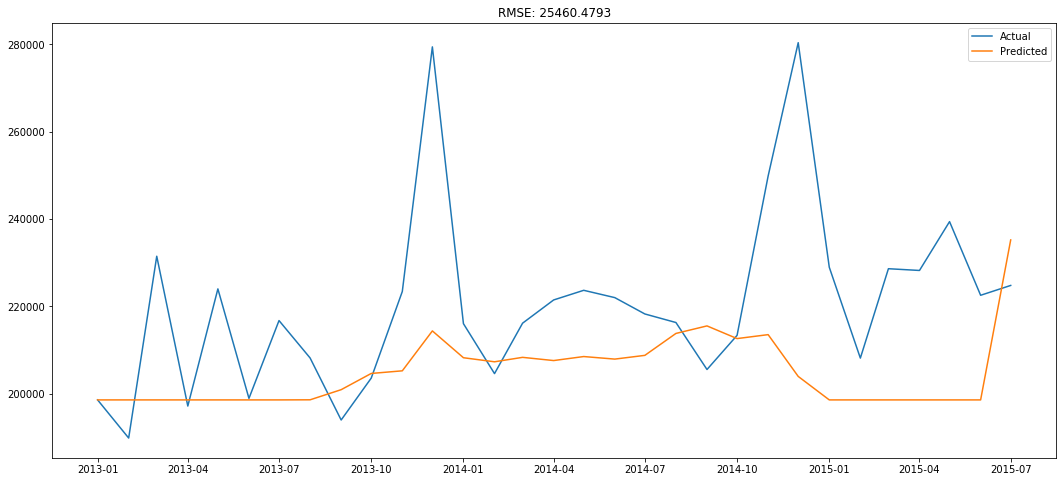

In [0]:
plt.plot(data,label='Actual')
plt.plot(predictions_ARIMA,label='Predicted')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

### So, this is our ARIMA Model plot which shows how the data has been fit. The model has a good fit while not overfitting too much nor underfitting. The RMSE is 25460.47

In [0]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions_ARIMA,data)

18051.207798500072

### ARIMA MODEL

| Model | RMSE | MAE |
| --- | --- | -- |
| ARIMA| 25460.47 | 18051.20|

## End of Week 2